In [20]:
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

# **Training a Random Forest Classifier**

In [21]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [22]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [23]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

| Parameter      | Description                                                        |
| -------------- | ------------------------------------------------------------------ |
| `n_estimators` | Number of trees in the forest                                      |
| `max_features` | Number of features to consider when splitting a node               |
| `bootstrap`    | Whether to sample observations with replacement (default = `True`) |
| `criterion`    | Split quality metric: `"gini"` (default) or `"entropy"`            |
| `n_jobs=-1`    | Use all CPU cores (faster training)                                |

---

`RandomForestClassifier` also uses many of the same parameters as `DecisionTree
Classifier`. For example, we can change the measure of split quality used:

In [24]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion="entropy",
                                              random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

# **Training a Random Forest Regressor**

In [25]:
data = datasets.fetch_california_housing()
features = data.data[:, :2]
target = data.target

In [26]:
# Create Random Forest Regressor
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train the model
model = randomforest.fit(features, target)

# **Identifying Important Features in Random Forests**

In [27]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [28]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [29]:
# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

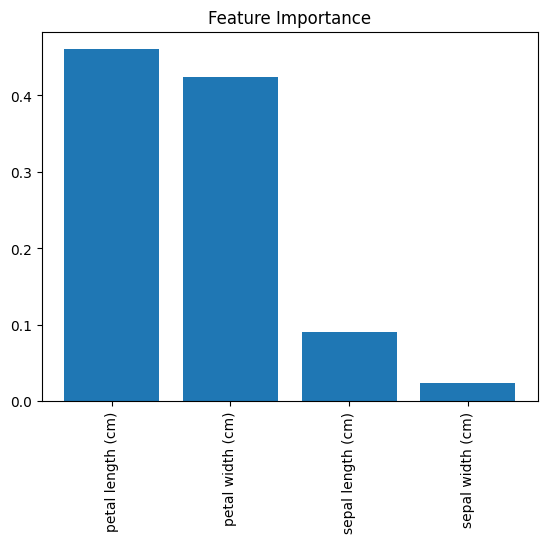

In [30]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [31]:
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

The **higher the number, the more important** the feature (all importance scores sum to 1). By plotting these values we can add interpretability to our random forest models.

# **Selecting Important Features in Random Forests**

In [32]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [33]:
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important featres
model = randomforest.fit(features_important, target)

In [34]:
model.feature_importances_

array([0.51108238, 0.48891762])

**Feature Selection Using Random Forest in scikit-learn**

=> **Problem**

Sometimes, we want to reduce the number of features in our model:
- To reduce **overfitting** (lower variance)
- To improve **model interpretability**
- To decrease **training time**

=> **Solution: 2-Stage Workflow**

1. **Train a Random Forest model** using **all features**
2. Use `.feature_importances_` to get **importance scores**
3. Use `SelectFromModel` to select only **important features**
4. Train a new model on this **reduced feature set**